In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sobol_seq import i4_sobol

from msfm.utils import files, parameters
from msfm.utils.cosmogrid import get_cosmo_params_info

### CosmoGrid params

In [46]:
cosmo_params_info = get_cosmo_params_info("../../data/CosmoGridV1_metainfo.h5")
print(cosmo_params_info.dtype)

all_Om = cosmo_params_info["Om"]
all_s8 = cosmo_params_info["s8"]
all_w0 = cosmo_params_info["w0"]
all_sobol = cosmo_params_info["sobol_index"]

[('As', '<f8'), ('bary_Mc', '<f8'), ('bary_nu', '<f8'), ('H0', '<f8'), ('O_cdm', '<f8'), ('O_nu', '<f8'), ('Ob', '<f8'), ('Ol', '<f8'), ('Om', '<f8'), ('m_nu', '<f8'), ('ns', '<f8'), ('s8', '<f8'), ('w0', '<f8'), ('wa', '<f8'), ('delta', 'S128'), ('sobol_index', '<i4'), ('benchmark_type', 'S128'), ('id_param', '<i4'), ('path_par', 'S128'), ('box_size_Mpc_over_h', '<f8'), ('n_particles', '<i8'), ('n_shells', '<i4'), ('n_steps', '<i4')]


### Extended params

In [47]:
conf = files.load_config()
sobol_priors = parameters.get_prior_intervals(
    conf["analysis"]["params"]["sobol"] + conf["analysis"]["params"]["ia"] + conf["analysis"]["params"]["bg"]
)

all_bg = []
all_n_bg = []
for i_sobol in sobol_index:
    sobol_point, _ = i4_sobol(sobol_priors.shape[0], i_sobol)
    sobol_params = sobol_point * np.squeeze(np.diff(sobol_priors)) + sobol_priors[:, 0]
    sobol_params = sobol_params.astype(np.float32)

    Aia = sobol_params[6]
    n_Aia = sobol_params[7]
    bg = sobol_params[8]
    n_bg = sobol_params[9]

    all_bg.append(bg)
    all_n_bg.append(n_bg)

# $\sigma_8 - b_g$ degeneracy

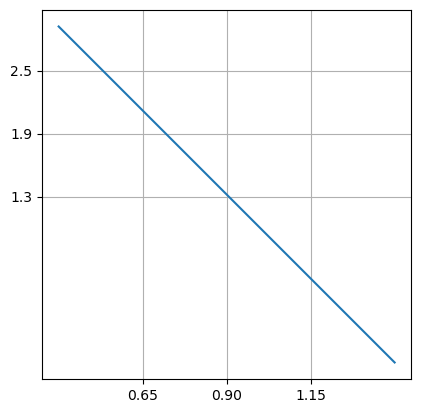

In [43]:
# b_g = -3.2 sigma_8 + 4.2
s8_prior = np.squeeze(parameters.get_prior_intervals(["s8"]))
x = np.linspace(s8_prior[0], s8_prior[1], 50)

fig, ax = plt.subplots()
ax.plot(x, -3.2*x + 4.2)
ax.set_xticks([0.65, 0.9, 1.15])
ax.set_yticks([1.3, 1.9, 2.5])
ax.set_box_aspect(1)
ax.grid(True)

In [56]:
assert len(all_Om) == len(all_s8) == len(all_w0) == len(all_bg) == len(all_n_bg)

# degenerate cosmos in the sigma_8, b_g plane
i_deg = []
for i, (Om, s8, w0, bg, n_bg) in enumerate(zip(all_Om, all_s8, all_w0, all_bg, all_n_bg)):
    
    # sigma_8 - b_g degeneracy plane 
    if np.abs(-3.2 * s8 + 4.2 - bg) <= 0.1:

        # Omega_m and w0
        if np.abs(Om - 0.25) <= 0.05 and np.abs(w0 + 1.0) <= 0.1:
            i_deg.append(sobol_index[i])

In [57]:
len(i_deg)

21